# Data Preparation And Cleaning


#### Objective: Load the data, replace missing values and process it for analysis

In [32]:
## Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
## Load data
df = pd.read_csv("Online Retail Copy.csv")

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [36]:
## Information about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [37]:
## Checking for missing value
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [38]:
## Drop missing values
df.dropna(inplace=True)

In [39]:
df.shape

(406829, 8)

In [41]:
## Convert invoice date column to a datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d/%m/%Y %H:%M")

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Exploratory Data Analysis

## Using EDA to Detect patterns, trends, and correlations

### Checking for Correlations


In [45]:
# Select only numerical columns (excluding categorical columns)
numeric_df = df.select_dtypes(include=["number"])

In [46]:
# Compute correlation matrix
correlation_matrix = numeric_df.corr()

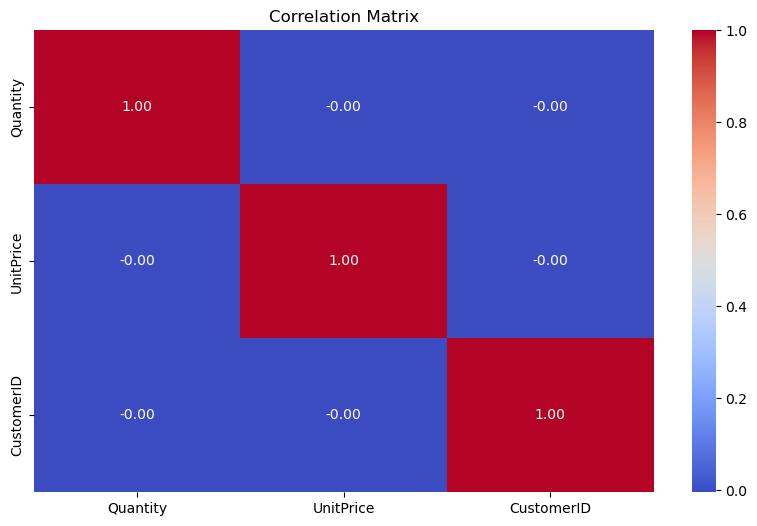

In [47]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Identifying Top 10 Best-Selling Products


In [52]:
if "Description" in df.columns:
    top_products = df["Description"].value_counts().head(10)

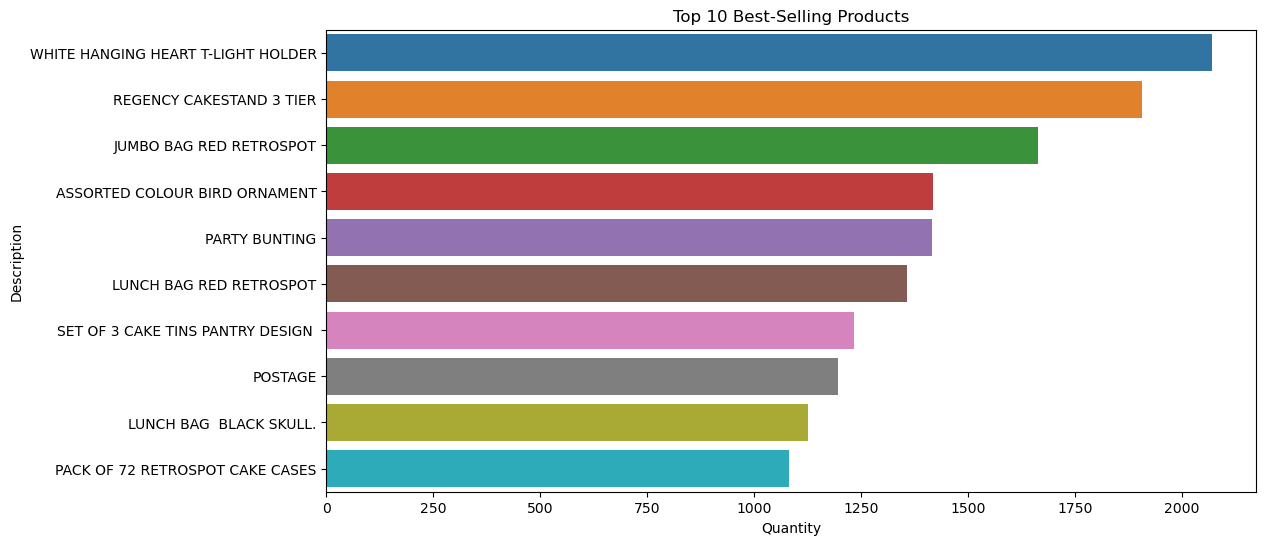

In [54]:
# Plot top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.xlabel("Quantity")
plt.ylabel("Description")
plt.title("Top 10 Best-Selling Products")
plt.show()

### Sales Trend Based on Quantity Sold

In [57]:
 # Group by Month and Sum Total Quantity Sold
df_trend = df.groupby(df['InvoiceDate'].dt.to_period("M"))["Quantity"].sum()

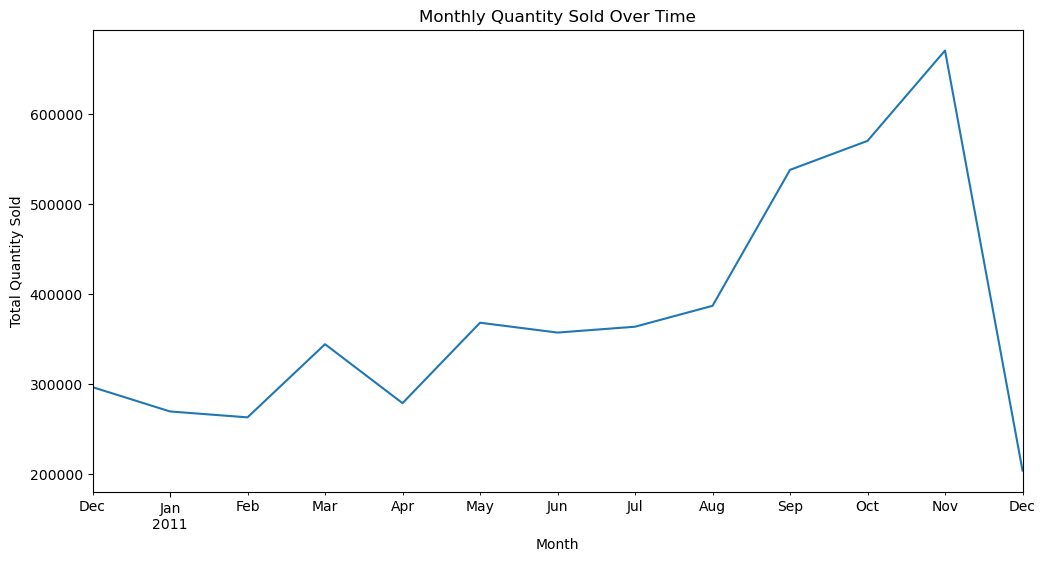

In [59]:
# Plot the trend
if "InvoiceDate" in df.columns:
    # Inside if block
    plt.figure(figsize=(12, 6))
    df_trend.plot()
    plt.title("Monthly Quantity Sold Over Time")
    plt.xlabel("Month")
    plt.ylabel("Total Quantity Sold")
    plt.show()

else:
    print("The 'InvoiceDate' column was not found in the dataset.")

### Check Customers Buying Behavior

In [60]:
if 'CustomerID' in df.columns:
    repeat_customers = df['CustomerID'].value_counts().head(10)

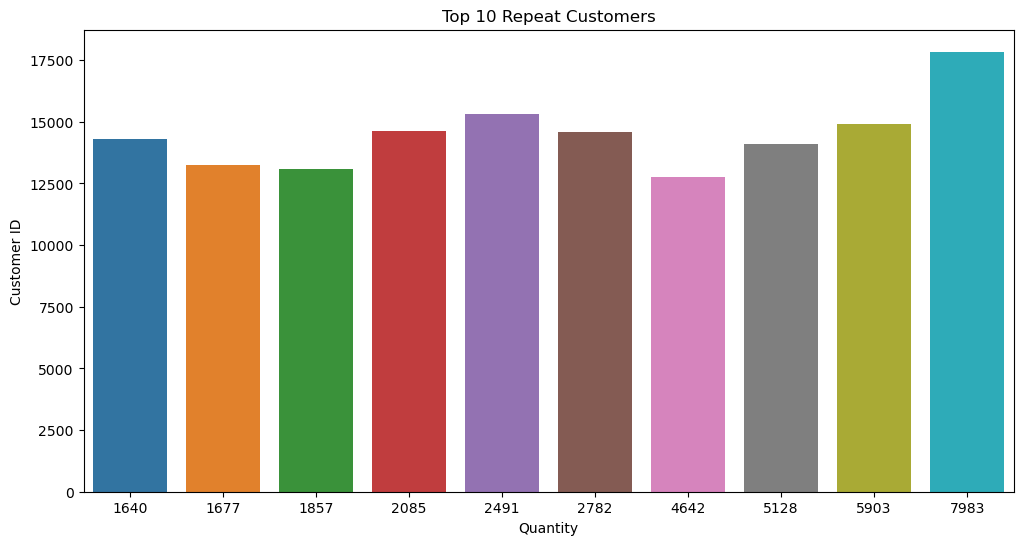

In [61]:
 # Plot repeat customers
plt.figure(figsize=(12, 6))
sns.barplot(x=repeat_customers.values, y=repeat_customers.index)
plt.xlabel("Quantity")
plt.ylabel("Customer ID")
plt.title("Top 10 Repeat Customers")
plt.show()

# Predictive Modelling

### Objective: Predict if a customer will purchase again based on past purchase behavior

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [86]:
# Select features (independent variables)
X = df[["Quantity", "UnitPrice"]]

In [87]:
# Create a target variable (Will a customer buy again? 1 = Yes, 0 = No)
df["RepeatPurchase"] = df["CustomerID"].duplicated(keep=False).astype(int)
y = df["RepeatPurchase"]

In [88]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Predict
y_pred = clf.predict(X_test)

In [91]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9998156478135831
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     81354

    accuracy                           1.00     81366
   macro avg       0.50      0.50      0.50     81366
weighted avg       1.00      1.00      1.00     81366



#### Interpretation: This model predicts whether a customer is likely to purchase again based on past buying patterns.



# Feature Engineering

In [92]:
# Get feature importance
feature_importance = clf.feature_importances_

In [93]:
# Convert to DataFrame for visualization
feat_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

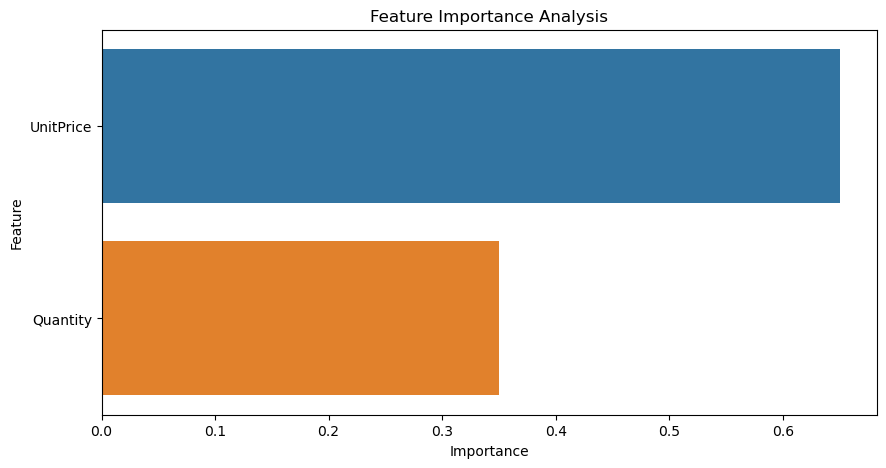

In [94]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_importance_df["Importance"], y=feat_importance_df["Feature"])
plt.title("Feature Importance Analysis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#### Interpretation: Features with higher importance contribute more to the prediction

# Clustering Analysis

### Objective: Group customers into segments based on their purchasing behavior

In [96]:
from sklearn.cluster import KMeans

### Step 1

In [102]:
# Select Features for Clustering
X_cluster = df[["Quantity", "UnitPrice"]]

In [103]:
# Normalize the data (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [104]:
# Train K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\awoti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
# Display cluster distribution
df["Cluster"].value_counts()

Cluster
0    406826
2         2
1         1
Name: count, dtype: int64

### Step 2

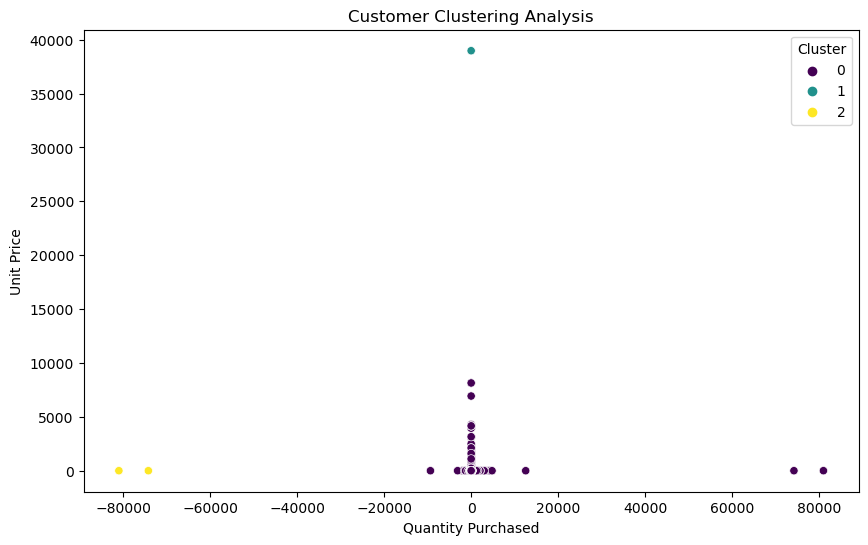

In [106]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Quantity"], y=df["UnitPrice"], hue=df["Cluster"], palette="viridis")
plt.title("Customer Clustering Analysis")
plt.xlabel("Quantity Purchased")
plt.ylabel("Unit Price")
plt.show()

# Customer Segmentation

### Identification of Key Customer Segments

In [115]:
from sklearn.cluster import MiniBatchKMeans

In [116]:
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1000)
df["Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\awoti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\awoti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


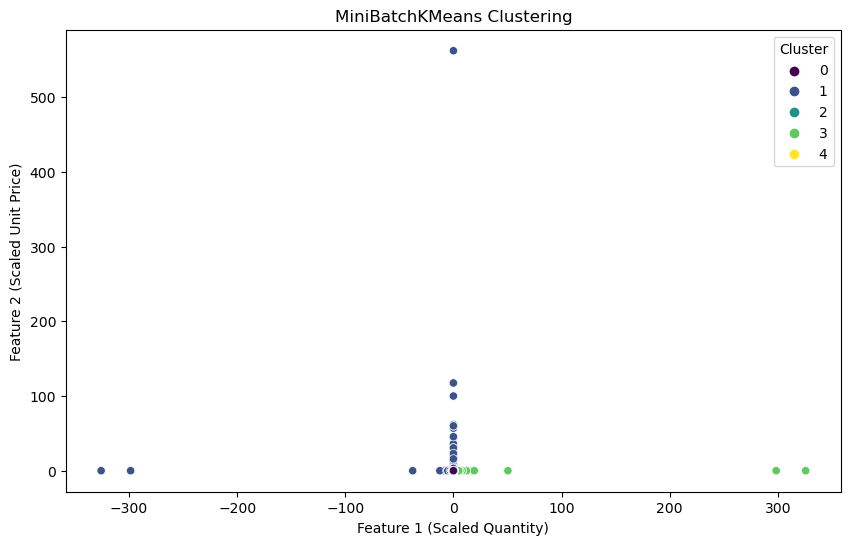

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df["Cluster"], palette="viridis")
plt.title("MiniBatchKMeans Clustering")
plt.xlabel("Feature 1 (Scaled Quantity)")
plt.ylabel("Feature 2 (Scaled Unit Price)")
plt.legend(title="Cluster")
plt.show()

### Each color represents a cluster of similar customer behavior or product patterns.

# Sales Forecasting

In [118]:
# Installed Prophet
!pip install prophet

# Aggregate Sales Data by Date


In [121]:
# Aggregate daily sales (replace "Quantity" with the actual sales column if different)
df_sales = df.groupby("InvoiceDate")["Quantity"].sum().reset_index()

In [122]:
# Rename columns for Prophet (Prophet requires "ds" for date and "y" for values)
df_sales.columns = ["ds", "y"]

In [123]:
# Display the processed dataset
print(df_sales.head())

                   ds    y
0 2010-12-01 08:26:00   40
1 2010-12-01 08:28:00   12
2 2010-12-01 08:34:00   98
3 2010-12-01 08:35:00    3
4 2010-12-01 08:45:00  449


# Train the Prophet Model

In [124]:
from prophet import Prophet

In [125]:
# Initialize the model
model = Prophet()

In [126]:
# Fit the model to sales data
model.fit(df_sales)

08:38:55 - cmdstanpy - INFO - Chain [1] start processing
08:38:56 - cmdstanpy - INFO - Chain [1] done processing


### Create Future Dates for Forecasting


In [128]:
# Generate future dates for the next 30 days
future = model.make_future_dataframe(periods=30)


In [129]:
# Make predictions
forecast = model.predict(future)

In [130]:
# Display predictions
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10))

                       ds        yhat   yhat_lower   yhat_upper
20480 2011-12-30 12:50:00  216.226740 -1311.562704  1902.257116
20481 2011-12-31 12:50:00   79.441170 -1563.793199  1588.376363
20482 2012-01-01 12:50:00  190.851701 -1365.435552  1641.382619
20483 2012-01-02 12:50:00  216.524909 -1397.091048  1795.746291
20484 2012-01-03 12:50:00  233.381977 -1340.361112  1781.409671
20485 2012-01-04 12:50:00  231.785005 -1277.351644  1713.465605
20486 2012-01-05 12:50:00  234.888452 -1237.942961  1851.685341
20487 2012-01-06 12:50:00  211.792967 -1322.439182  1652.664138
20488 2012-01-07 12:50:00   75.007397 -1476.600861  1649.005842
20489 2012-01-08 12:50:00  186.417929 -1397.195901  1728.448464


### Visualize the Forecast

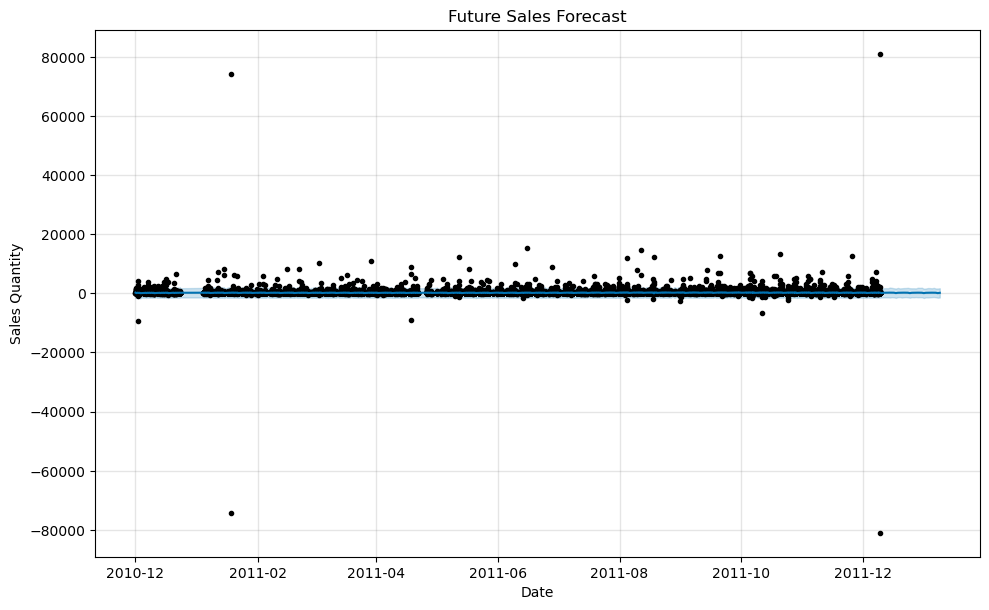

In [131]:
# Plot forecast
fig = model.plot(forecast)
plt.title("Future Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.show()

# Extract Business Insights from Forecast

In [132]:
# Add moving average to detect trends
forecast["moving_avg"] = forecast["yhat"].rolling(window=5).mean()

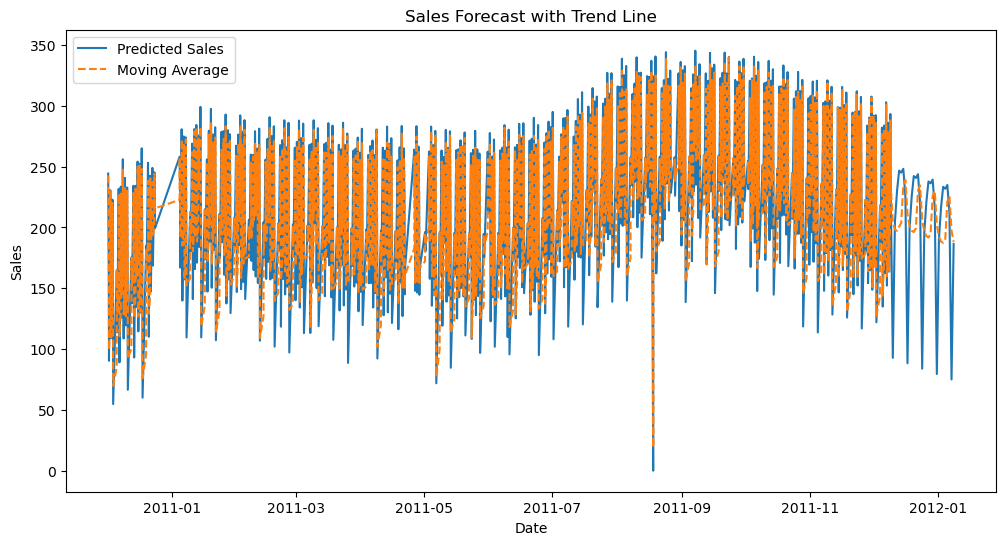

In [133]:
# Plot trend with moving average
plt.figure(figsize=(12,6))
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Sales")
plt.plot(forecast["ds"], forecast["moving_avg"], label="Moving Average", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast with Trend Line")
plt.legend()
plt.show()

# Evaluation of Forecast Accuracy

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual = df_sales["y"].values  # Actual sales values
predicted = forecast["yhat"][:len(actual)].values  # Forecasted values

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 244.1843669896603
Root Mean Squared Error (RMSE): 1219.6870722750962


## Save Forecasted Sales Data

In [136]:
forecast.to_csv("future_sales_predictions.csv", index=False)
print("Predictions saved successfully in the current directory!")



Predictions saved successfully in the current directory!
